In [45]:
import numpy as np
from skimage import io, color, transform
from matplotlib import pyplot as plt
import os
image_size = 256
# image = np.random.rand(image_size, image_size, 3)
# image[:, :, 0] = image[:, :, 0] * 100
# image[:, :, 1:] = image[:, :, 1:] * 256 - 128

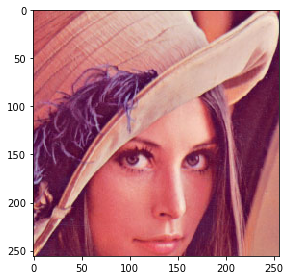

In [248]:
images = np.zeros((5, image_size, image_size, 3))
for index, image in enumerate(os.listdir("test")):
    images[index, :, :, :] = transform.resize(io.imread("test/" + image), (image_size, image_size))

io.imshow(images[2])
plt.show()
images = color.rgb2lab(images)

In [ ]:
colors = np.arange(-135, 145, 10)
bins_to_colors = np.arange(-130, 140, 10)
print(bins_to_colors)
bins = np.zeros((5, image_size, image_size))
binned = np.zeros((5, image_size, image_size, 676))
# image_colors_positived = images[:, :, :, 1:] + 133
image_colors_in_bins = np.digitize(images[:, :, :, 1:], colors)
print image_colors_in_bins[1, :, :, 1]
one_hot = np.eye(676)
bins = 26*image_colors_in_bins[:, :, :, 0] + image_colors_in_bins[:, :, :, 1]
binned[:, :, :] = one_hot[bins[:, :, :]]
print np.argwhere(binned[1]==1)[:, 2].reshape((image_size, image_size))

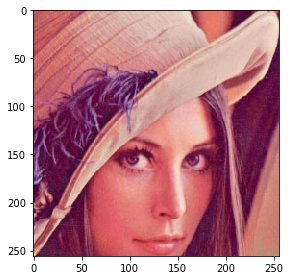

In [247]:
reverted_image = np.zeros((image_size, image_size, 3)).astype(int)
image_binned = np.argwhere(binned[2, :, :]==1)[:, 2].reshape((image_size, image_size))
reverted_image[:, :, 0] = images[2, :, :, 0]
reverted_image[:, :, 2] = np.mod(image_binned ,np.full((image_size, image_size), 26))
reverted_image[:, :, 1] = (image_binned - reverted_image[:, :, 2]) / 26


reverted_image[:, :, 1:] = bins_to_colors[reverted_image[:, :, 1:]-1]

io.imshow(color.lab2rgb(reverted_image*1.0))

plt.show()